Treinamento do Adaline com momentum
===========================
Objetivos:
* Implementar o algoritmo de treinamento do Adaline com momentum;
* Testar se a técnica de treinamento com momentum agiliza o treinamento do
Adaline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Declaração de funções


In [2]:
#implementação do Adaline
def yadaline(w,b,x):
    y = np.dot(w,x) + b                                                           #implementa a multiplicação de todos os valores de w e x
    return y


In [3]:
def treina_adaline(W, b, X, yd, alfa, beta = 0, max_epoch = 1000, error_tolerance = 0.0001):
    '''
    Treina o Adaline.
    Entradas: W,b,X,yd,alfa,max_epoch,error_tolerance
    Retorno: W,b,vec_SEQ
    '''
    n = np.size(X)                                                              #numero de amostras de X
    SEQ = error_tolerance                                                       #SEQ = somatório dos erros quadraticos
    epoch = 1                                                                   #começa na época 1
    vec_SEQ = []
    Wa = W                          # Wa = W anterior
    Wp = W                          # Wp = W passado
    ba = b                          # ba = b anterior
    bp = b                          # bp = b passado

    while(epoch <= max_epoch and SEQ >= error_tolerance):
      SEQ = 0                                                                   #inicializa SEQ da época
      for i in range(n):                                                        #para cada amostra de X
        y_i = yadaline(Wa, ba, X[i])                                              #determinar a saida do neuronio para a amostra i
        error_i = yd[i] - y_i                                                   #determinar o erro
        # Wf = w final | bf = b final (nessa iteracao)
        Wf = Wa + alfa * error_i * X[i].T + beta * (Wa - Wp)                      #atualiza o vetor de pesos com taxa de aprendizagem(alpha) e momentum(beta)
        bf = ba + alfa * error_i + beta * (ba - bp)                               #atualiza o bias com tx de aprendiz. e momentum
        #atualiza pesos para a proxima iteracao
        Wp = Wa
        bp = ba
        Wa = Wf
        ba = bf
        SEQ = SEQ + error_i ** 2                                                #acumula o SEQ
      vec_SEQ.append(SEQ.item())                                                #salva SEQ da epoca  - Essa alteração (.item()) garante que o valor de SEQ seja adicionado à lista como um escalar, eliminando as dimensões extras.
      epoch = epoch + 1

    return (Wf, bf, vec_SEQ)


In [4]:
def plot_SEQ(vec_SEQ):
    plt.figure()
    plt.plot(range(1, len(vec_SEQ) + 1), vec_SEQ, marker='.')
    plt.title('Soma dos Erros Quadráticos (SEQ) por Época')
    plt.xlabel('Épocas')
    plt.ylabel('SEQ')
    plt.grid(True)
    plt.show()


In [5]:
def mistura(X, yd):
    '''
    Mistura os dados da matriz X e tambem a classificacao correspondentemente de cada amostra no vetor yd.

    Entradas: X,yd
    Retorno: xp,yp

    Onde:
    X = matriz (2 x N) com as amostras (por coluna) de todas as classes
    yd = vetor linha (1 x N) com a classificação numérica dos dados
    xp = matriz (2 x N) com as amostras (por coluna) de todas as classes misturadas
    yp = vetor linha (1 x N) com a classificação numérica dos dados misturada
    N = número total de amostras (soma de todas as classes)

    '''
    X = X.T                   #transpoe a matriz para voltar ao formato amostra por linha antes do embaralhamento
    xp, yp = shuffle(X, yd)
    xp = xp.T                 #transpoe a matriz para manter o formato de amostra por coluna

    return (xp, yp)

## Geração dos dados

In [6]:
#gera dados de X e y
qtd_amostras = 300
qtd_atributos = 1

#X = np.linspace(0,99,5)
X = np.linspace(1,10,qtd_amostras)
yd = 3*X + 2

#print('X = ', X)
#print('yd = ', yd)

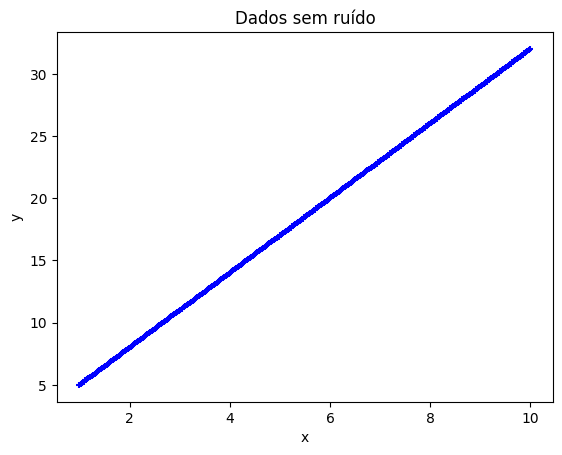

In [7]:
plt.scatter(X, yd, marker="+", c='b', s=20)
#plt.plot(X, yd, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados sem ruído')
plt.show()

In [8]:
#misturando as posições dos dados

Xp, yp = mistura(X, yd)

## Adicionando ruido aos dados

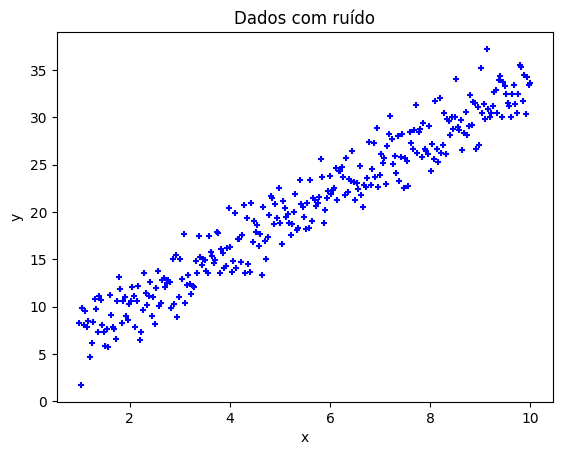

In [9]:
# Parâmetros do ruído
media_ruido = 2    # média do ruído
desvio_padrao_ruido = 2   # desvio padrão do ruído

# Gerar ruído
ruido = np.random.normal(media_ruido, desvio_padrao_ruido, yd.shape)

yd_ruido = yd + ruido

plt.scatter(X, yd_ruido, marker="+", c='b', s=20)
#plt.plot(X, yd_ruido, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados com ruído')
plt.show()

#embaralha os dados
Xp_ruido, yp_ruido = mistura(X, yd_ruido)

# print('X = ', Xp_ruido)
# print('yd = ', yp_ruido)

## Treinamento do Adaline

In [10]:
#Define os parametros para o Adaline

maxepocas = 1000
tol = 0.01
alfa = 0.001 #1e-4
beta = 0.001 #1e-3

w_original = np.random.rand(1, qtd_atributos)
b_original = np.random.rand(1, 1)

w = w_original
b = b_original
w_m = w_original    # w para caso com momentum
b_m = b_original    # b para caso com momentum

print('w = ', w_original)
print('b = ', b_original)

w =  [[0.2116401]]
b =  [[0.35832337]]


### Caso SEM Momentum (beta = 0)

In [11]:
# treina para o caso SEM momentum (beta = 0)
w, b, vec_SEQ = treina_adaline(w, b, Xp_ruido, yp_ruido, alfa, beta = 0, max_epoch = maxepocas, error_tolerance = tol)

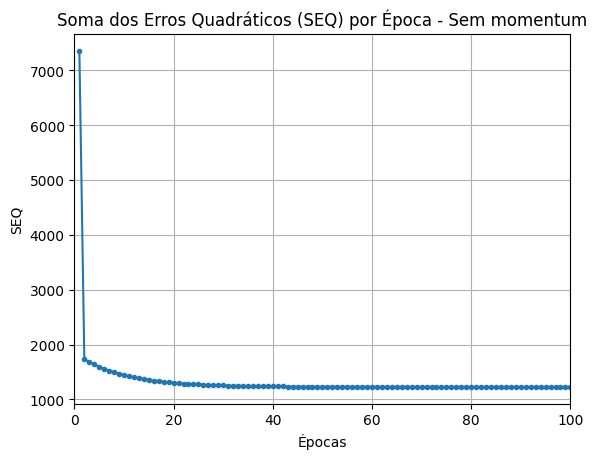

In [12]:
plt.figure()
plt.plot(range(1, len(vec_SEQ) + 1), vec_SEQ, marker='.')
plt.title('Soma dos Erros Quadráticos (SEQ) por Época - Sem momentum')
plt.xlabel('Épocas')
plt.ylabel('SEQ')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

In [13]:
# Testar o ADALINE treinado com as entradas de treinamento
y = np.array([yadaline(w, b, x) for x in Xp_ruido])  # Gera um array NumPy diretamente

# Achata y para um vetor unidimensional - para poder plotar no grafico
y = y.flatten()


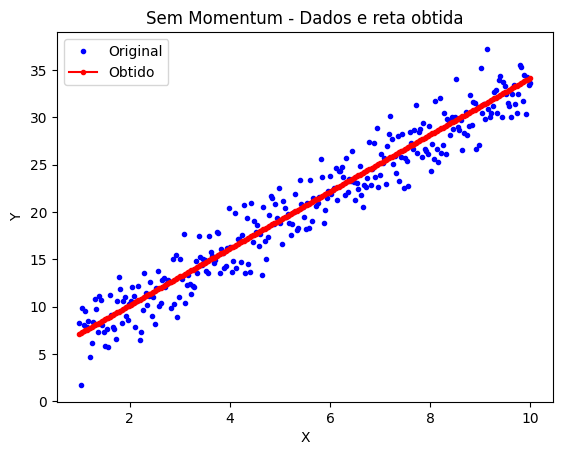

In [14]:
# Plota a reta original e a reta obtida com o Adaline
plt.figure()
plt.plot(Xp_ruido, yp_ruido, 'b.', label='Original')
plt.plot(Xp_ruido, y, 'r.-', label='Obtido')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sem Momentum - Dados e reta obtida')
plt.legend()
plt.show()


### Caso COM Momentum (beta)

In [15]:
# treina para o caso COM momentum (beta != 0)
w_m, b_m, vec_SEQ_m = treina_adaline(w_m, b_m, Xp_ruido, yp_ruido, alfa, beta = 0.1, max_epoch = maxepocas, error_tolerance = tol)

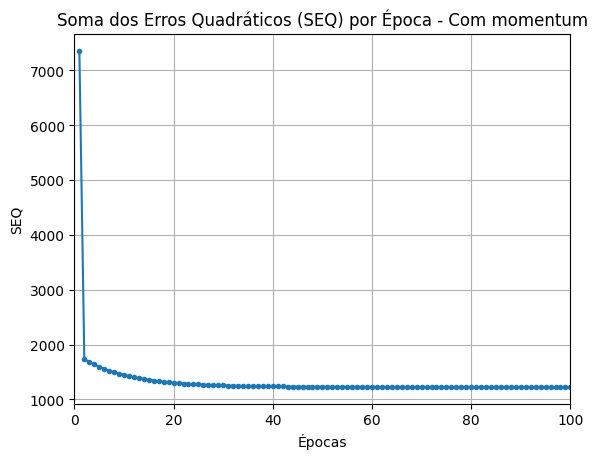

In [16]:
plt.figure()
plt.plot(range(1, len(vec_SEQ_m) + 1), vec_SEQ, marker='.')
plt.title('Soma dos Erros Quadráticos (SEQ) por Época - Com momentum')
plt.xlabel('Épocas')
plt.ylabel('SEQ')
plt.xlim(0, 100)
plt.grid(True)
plt.show()

In [17]:
# Testar o ADALINE treinado com as entradas de treinamento
y_m = np.array([yadaline(w_m, b_m, x) for x in Xp_ruido])  # Gera um array NumPy diretamente

# Achata y para um vetor unidimensional - para poder plotar no grafico
y_m = y.flatten()


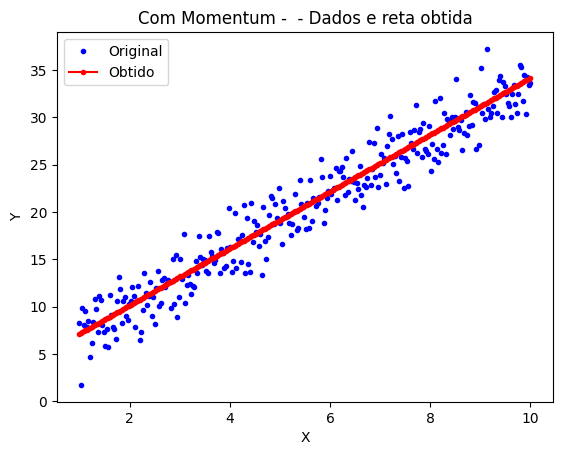

In [18]:
# Plota a reta original e a reta obtida com o Adaline
plt.figure()
plt.plot(Xp_ruido, yp_ruido, 'b.', label='Original')
plt.plot(Xp_ruido, y_m, 'r.-', label='Obtido')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Com Momentum -  - Dados e reta obtida')
plt.legend()
plt.show()

In [19]:
SEQ_diff = np.array(vec_SEQ) - np.array(vec_SEQ_m)
# Convert vec_SEQ and vec_SEQ_m to NumPy arrays before subtraction.
# NumPy arrays support element-wise operations.


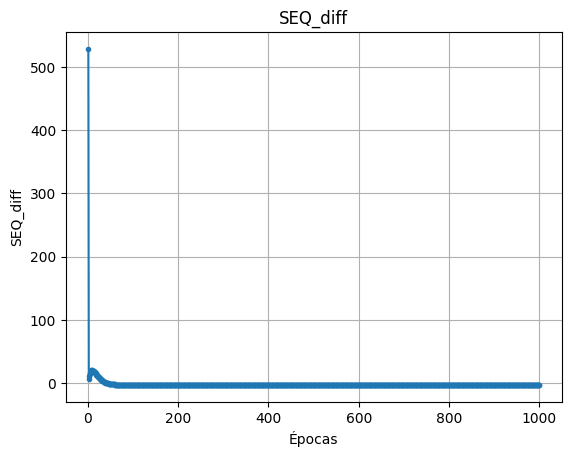

In [21]:
#plot SEQ_diff to watch the difference
plt.figure()
plt.plot(range(1, len(SEQ_diff) + 1), SEQ_diff, marker='.')
plt.title('SEQ_diff')
plt.xlabel('Épocas')
plt.ylabel('SEQ_diff')
plt.grid(True)
plt.show()

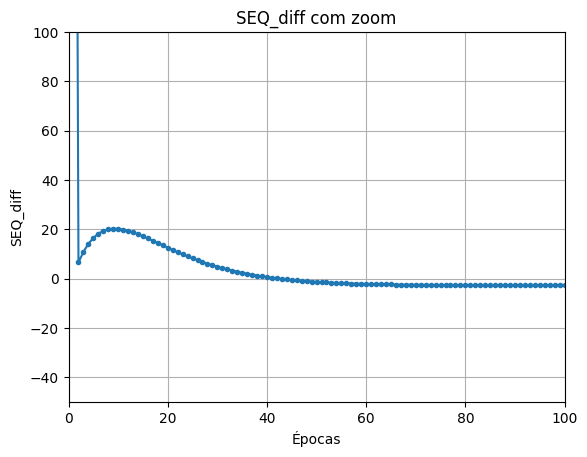

In [20]:
#plot SEQ_diff to watch the difference
plt.figure()
plt.plot(range(1, len(SEQ_diff) + 1), SEQ_diff, marker='.')
plt.title('SEQ_diff com zoom')
plt.xlabel('Épocas')
plt.ylabel('SEQ_diff')
plt.xlim(0, 100)
plt.ylim(-50, 100)
plt.grid(True)
plt.show()